In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
base_dir = '/content/drive/MyDrive/Classification/glomeruli/dataset'
train_dir = os.path.join(base_dir, 'train/')
validation_dir = os.path.join(base_dir, 'val/')

# Directory with our training cat pictures
train_nor_dir = os.path.join(train_dir, '1_normal')

# Directory with our training dog pictures
train_scl_dir = os.path.join(train_dir, '0_sclerosed')

# Directory with our validation cat pictures
validation_nor_dir = os.path.join(validation_dir, '1_normal')

# Directory with our validation dog pictures
validation_scl_dir = os.path.join(validation_dir, '0_sclerosed')

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pre_trained_model = InceptionV3(input_shape = (256, 256, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.959):
      print("\nEarly Stopping")
      self.model.stop_training = True

## Training

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)

model = Model( pre_trained_model.input, x)

model.compile(optimizer = RMSprop(lr=0.0001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])
model.input

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   channel_shift_range=0.2,
                                   fill_mode='nearest',
                                   vertical_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (256, 256))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary',
                                                          target_size = (256, 256))

Found 1126 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
callbacks = myCallback()
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 10,
            epochs = 15,
            validation_steps = 10,
            verbose = 2,
            callbacks=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/15
10/10 - 172s - loss: 7.1200 - acc: 0.7250 - val_loss: 0.3708 - val_acc: 0.9450 - 172s/epoch - 17s/step
Epoch 2/15
10/10 - 37s - loss: 1.9333 - acc: 0.8400 - val_loss: 2.5679 - val_acc: 0.7400 - 37s/epoch - 4s/step
Epoch 3/15
10/10 - 36s - loss: 1.1493 - acc: 0.8850 - val_loss: 1.5761 - val_acc: 0.8450 - 36s/epoch - 4s/step
Epoch 4/15
10/10 - 26s - loss: 1.0387 - acc: 0.8550 - val_loss: 0.7093 - val_acc: 0.9100 - 26s/epoch - 3s/step
Epoch 5/15
10/10 - 21s - loss: 1.4735 - acc: 0.8548 - val_loss: 1.0200 - val_acc: 0.9000 - 21s/epoch - 2s/step
Epoch 6/15
10/10 - 19s - loss: 0.8694 - acc: 0.8710 - val_loss: 0.4810 - val_acc: 0.9500 - 19s/epoch - 2s/step
Epoch 7/15
10/10 - 17s - loss: 0.7093 - acc: 0.8650 - val_loss: 0.3037 - val_acc: 0.9550 - 17s/epoch - 2s/step
Epoch 8/15
10/10 - 14s - loss: 0.3488 - acc: 0.9400 - val_loss: 0.3985 - val_acc: 0.9400 - 14s/epoch - 1s/step
Epoch 9/15
10/10 - 15s - loss: 1.3127 - acc: 0.8656 - val_loss: 0.5185 - val_acc: 0.9150 - 15s/epoch - 2s/ste

In [ ]:
model.save("/content/drive/MyDrive/Classification/inceptionV3")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Classification/inceptionV3/assets


15 15 15


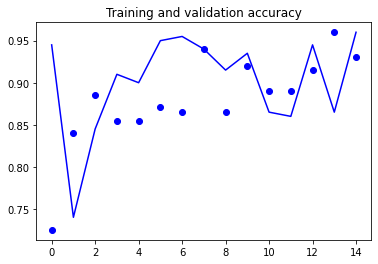

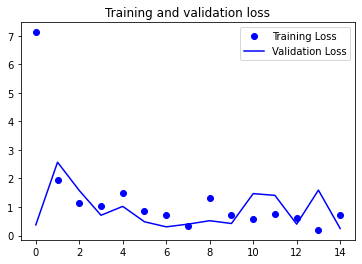

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
print(len(acc), len(val_acc), len(epochs))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## PREDICTION

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Classification/inceptionV3')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
path, dirs, files = next(os.walk("/content/drive/MyDrive/glomeruli_segmentation/dataset"))
file_count = len(files) #to find number of files in folder
print(file_count)

1326


In [ ]:
import os
from PIL import ImageOps
from PIL import Image
import numpy as np


arr = os.listdir('/content/drive/MyDrive/glomeruli_segmentation/dataset')
# print(arr)
scl = 0
nor = 0

pred_1 = [0 for i in range(1326)]
c=0
for i in arr:
  data = np.ndarray(shape=(1, 256, 256, 3), dtype=np.float32)
  image = Image.open('/content/drive/MyDrive/glomeruli_segmentation/dataset/'+i)
  size = (256, 256)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)
  image_array = np.asarray(image)
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
  normalized_image_array.reshape(256,256,3)
  data[0] = normalized_image_array
  prediction = model.predict(data)
  if(prediction[0][0]>0.5):
    pred_1[c] = 1
    nor+=1
  else:
    scl+=1
  c+=1;

print(scl,nor)
print(pred_1)

502 824
[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

# actual values
scl = [0 for i in range(502)]
nor = [1 for i in range(824)]
actual = np.append(scl,nor)

# predicted values
# predicted = pred1


# confusion matrix
matrix = confusion_matrix(actual,pred_1, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,pred_1,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,pred_1,labels=[1,0])
print('Classification report : \n',matrix)


Confusion matrix : 
 [[379 445]
 [445  57]]
Outcome values : 
 379 445 445 57
Classification report : 
               precision    recall  f1-score   support

           1       0.46      0.46      0.46       824
           0       0.11      0.11      0.11       502

    accuracy                           0.33      1326
   macro avg       0.29      0.29      0.29      1326
weighted avg       0.33      0.33      0.33      1326



# NEW

In [ ]:
path, dirs, files = next(os.walk("/content/drive/MyDrive/Segmentation/new"))
file_count = len(files) #to find number of files in folder
print(file_count)

1440


In [ ]:
import os
from PIL import ImageOps
from PIL import Image
import numpy as np


arr = os.listdir('/content/drive/MyDrive/Segmentation/new')
# print(arr)
scl = 0
nor = 0

pred_1 = [0 for i in range(1440)]
c=0
for i in arr:
  data = np.ndarray(shape=(1, 256, 256, 3), dtype=np.float32)
  image = Image.open('/content/drive/MyDrive/Segmentation/new/'+i)
  size = (256, 256)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)
  image_array = np.asarray(image)
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
  normalized_image_array.resize((256,256,3), refcheck=True)
  data[0] = normalized_image_array
  prediction = model.predict(data)
  if(prediction[0][0]>0.5):
    pred_1[c] = 1
    nor+=1
  else:
    scl+=1
  c+=1;

print(scl,nor)
print(pred_1)

1348 92
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

# MISC

## PREDICT 1

In [ ]:
path, dirs, files = next(os.walk("/content/drive/MyDrive/Segmentation/new"))
file_count = len(files) #to find number of files in folder
print(file_count)

path, dirs, files = next(os.walk("/content/drive/MyDrive/glomeruli_segmentation/dataset"))
file_count = len(files) #to find number of files in folder
print(file_count)

1440
1326


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Classification/inceptionV3')

In [ ]:
import os
from PIL import ImageOps
from PIL import Image
import numpy as np


arr = os.listdir('/content/drive/MyDrive/Classification/glomeruli/dataset/test/0_sclerosed')
print(arr)
scl = 0
nor = 0

pred_1 = [0 for i in range(76)]
c=0
for i in arr:
  data = np.ndarray(shape=(1, 256, 256, 3), dtype=np.float32)
  image = Image.open('/content/drive/MyDrive/Classification/glomeruli/dataset/test/0_sclerosed/'+i)
  size = (256, 256)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)
  image_array = np.asarray(image)
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
  normalized_image_array.reshape(256,256,3)
  data[0] = normalized_image_array
  prediction = model.predict(data)
  if(prediction[0][0]>0.5):
    pred_1[c] = 1
    nor+=1
  else:
    scl+=1
  c+=1;

print(scl,nor)
print(pred_1)

['sclerosed_0216.png', 'sclerosed_0368.png', 'sclerosed_0211.png', 'sclerosed_0170.png', 'sclerosed_0411.png', 'sclerosed_0183.png', 'sclerosed_0470.png', 'sclerosed_0238.png', 'sclerosed_0337.png', 'sclerosed_0481.png', 'sclerosed_0474.png', 'sclerosed_0435.png', 'sclerosed_0351.png', 'sclerosed_0341.png', 'sclerosed_0301.png', 'sclerosed_0270.png', 'sclerosed_0492.png', 'sclerosed_0339.png', 'sclerosed_0234.png', 'sclerosed_0479.png', 'sclerosed_0213.png', 'sclerosed_0184.png', 'sclerosed_0420.png', 'sclerosed_0358.png', 'sclerosed_0247.png', 'sclerosed_0451.png', 'sclerosed_0267.png', 'sclerosed_0466.png', 'sclerosed_0277.png', 'sclerosed_0447.png', 'sclerosed_0319.png', 'sclerosed_0274.png', 'sclerosed_0486.png', 'sclerosed_0383.png', 'sclerosed_0346.png', 'sclerosed_0393.png', 'sclerosed_0255.png', 'sclerosed_0328.png', 'sclerosed_0379.png', 'sclerosed_0292.png', 'sclerosed_0417.png', 'sclerosed_0318.png', 'sclerosed_0432.png', 'sclerosed_0233.png', 'sclerosed_0394.png', 'sclerose

In [ ]:
import os
from PIL import ImageOps
from PIL import Image


arr = os.listdir('/content/drive/MyDrive/Classification/glomeruli/dataset/test/1_normal')
print(arr)
scl = 0
nor = 0
c=0
pred_2 = [0 for i in range(124)]
for i in arr:
  data = np.ndarray(shape=(1, 256, 256, 3), dtype=np.float32)
  image = Image.open('/content/drive/MyDrive/Classification/glomeruli/dataset/test/1_normal/'+i)
  size = (256, 256)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)
  image_array = np.asarray(image)
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
  data[0] = normalized_image_array
  prediction = model.predict(data)
  if(prediction[0][0]>0.5):
      pred_2[c] = 1
      nor+=1
  else:
      scl+=1
  c+=1

print(pred_2)
print(scl,nor)

['normal_0821.png', 'normal_0806.png', 'normal_0790.png', 'normal_0815.png', 'normal_0818.png', 'normal_0793.png', 'normal_0738.png', 'normal_0565.png', 'normal_0705.png', 'normal_0700.png', 'normal_0750.png', 'normal_0586.png', 'normal_0783.png', 'normal_0713.png', 'normal_0723.png', 'normal_0721.png', 'normal_0486.png', 'normal_0663.png', 'normal_0447.png', 'normal_0551.png', 'normal_0743.png', 'normal_0608.png', 'normal_0522.png', 'normal_0681.png', 'normal_0566.png', 'normal_0448.png', 'normal_0490.png', 'normal_0617.png', 'normal_0547.png', 'normal_0788.png', 'normal_0669.png', 'normal_0646.png', 'normal_0460.png', 'normal_0647.png', 'normal_0584.png', 'normal_0696.png', 'normal_0451.png', 'normal_0753.png', 'normal_0776.png', 'normal_0648.png', 'normal_0785.png', 'normal_0761.png', 'normal_0657.png', 'normal_0739.png', 'normal_0459.png', 'normal_0532.png', 'normal_0502.png', 'normal_0697.png', 'normal_0747.png', 'normal_0386.png', 'normal_0402.png', 'normal_0404.png', 'normal_024

In [ ]:
import pathlib
initial_count = 0
for path in pathlib.Path("/content/drive/MyDrive/Classification/glomeruli/dataset/test/1_normal").iterdir():
    if path.is_file():
        initial_count += 1

print(initial_count)

124


In [ ]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

# actual values
scl = [0 for i in range(76)]
nor = [1 for i in range(124)]
actual = np.append(scl,nor)

# predicted values
predicted = np.append(pred_1,pred_2)
print(predicted)

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)


[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix : 
 [[122   2]
 [  6  70]]
Outcome values : 
 122 2 6 70
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.98      0.97       124
           0       0.97      0.92      0.95        76

    accuracy                           0.96       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.96      0.96      0.96       200



In [ ]:
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

sensitivity1 = matrix[0,0]/(matrix[0,0]+matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = matrix[1,1]/(matrix[1,0]+matrix[1,1])
print('Specificity : ', specificity1)

Confusion matrix : 
 [[122   2]
 [  6  70]]
Sensitivity :  0.9838709677419355
Specificity :  0.9210526315789473


## NOT ALL LAYERS

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7') #Only use layers including and above 'mixed7'
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 14, 14, 768)


In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)

model = Model( pre_trained_model.input, x)

model.compile(optimizer = RMSprop(lr=0.0001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   channel_shift_range=0.2,
                                   fill_mode='nearest',
                                   vertical_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (256,256))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary',
                                                          target_size = (256,256))

callbacks = myCallback()
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 10,
            epochs = 15,
            validation_steps = 10,
            verbose = 2,
            callbacks=None)

last layer output shape:  (None, 14, 14, 768)
Found 1126 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
10/10 - 11s - loss: 3.3030 - acc: 0.4900 - val_loss: 0.3336 - val_acc: 0.8850 - 11s/epoch - 1s/step
Epoch 2/15
10/10 - 6s - loss: 0.6613 - acc: 0.6720 - val_loss: 0.3659 - val_acc: 0.8150 - 6s/epoch - 630ms/step
Epoch 3/15
10/10 - 7s - loss: 0.6469 - acc: 0.7150 - val_loss: 0.3955 - val_acc: 0.7950 - 7s/epoch - 659ms/step
Epoch 4/15
10/10 - 8s - loss: 0.3135 - acc: 0.8600 - val_loss: 0.2022 - val_acc: 0.9150 - 8s/epoch - 801ms/step
Epoch 5/15
10/10 - 7s - loss: 0.4507 - acc: 0.8100 - val_loss: 0.2179 - val_acc: 0.9100 - 7s/epoch - 669ms/step
Epoch 6/15
10/10 - 6s - loss: 0.3521 - acc: 0.8548 - val_loss: 0.1276 - val_acc: 0.9500 - 6s/epoch - 586ms/step
Epoch 7/15
10/10 - 6s - loss: 0.2492 - acc: 0.9150 - val_loss: 0.1129 - val_acc: 0.9750 - 6s/epoch - 596ms/step
Epoch 8/15
10/10 - 6s - loss: 0.3584 - acc: 0.8763 - val_loss: 0.1297 - val_acc: 0.9450 - 6s/epoch - 564ms/step
Epoch 9/15
10/10 - 6s - loss: 0.3303 - acc: 0.8650 - val_loss: 0.2509 - val_acc: 0.8950 - 6s/epoch - 586m

In [ ]:
model.save("/content/drive/MyDrive/Classification/inceptionV3_notall")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Classification/inceptionV3_notall/assets


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Classification/inceptionV3_notall')

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

## PREDICT 2

In [ ]:
import os
from PIL import ImageOps
from PIL import Image
import numpy as np


arr = os.listdir('/content/drive/MyDrive/Classification/glomeruli/dataset/test/0_sclerosed')
print(arr)
scl = 0
nor = 0

pred_1 = [0 for i in range(76)]
c=0
for i in arr:
  data = np.ndarray(shape=(1, 256, 256, 3), dtype=np.float32)
  image = Image.open('/content/drive/MyDrive/Classification/glomeruli/dataset/test/0_sclerosed/'+i)
  size = (256, 256)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)
  image_array = np.asarray(image)
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
  data[0] = normalized_image_array
  prediction = model.predict(data)
  if(prediction[0][0]>0.5):
    pred_1[c] = 1
    nor+=1
  else:
    scl+=1
  c+=1;

print(scl,nor)
print(pred_1)

['sclerosed_0216.png', 'sclerosed_0368.png', 'sclerosed_0211.png', 'sclerosed_0170.png', 'sclerosed_0411.png', 'sclerosed_0183.png', 'sclerosed_0470.png', 'sclerosed_0238.png', 'sclerosed_0337.png', 'sclerosed_0481.png', 'sclerosed_0474.png', 'sclerosed_0435.png', 'sclerosed_0351.png', 'sclerosed_0341.png', 'sclerosed_0301.png', 'sclerosed_0270.png', 'sclerosed_0492.png', 'sclerosed_0339.png', 'sclerosed_0234.png', 'sclerosed_0479.png', 'sclerosed_0213.png', 'sclerosed_0184.png', 'sclerosed_0420.png', 'sclerosed_0358.png', 'sclerosed_0247.png', 'sclerosed_0451.png', 'sclerosed_0267.png', 'sclerosed_0466.png', 'sclerosed_0277.png', 'sclerosed_0447.png', 'sclerosed_0319.png', 'sclerosed_0274.png', 'sclerosed_0486.png', 'sclerosed_0383.png', 'sclerosed_0346.png', 'sclerosed_0393.png', 'sclerosed_0255.png', 'sclerosed_0328.png', 'sclerosed_0379.png', 'sclerosed_0292.png', 'sclerosed_0417.png', 'sclerosed_0318.png', 'sclerosed_0432.png', 'sclerosed_0233.png', 'sclerosed_0394.png', 'sclerose

In [ ]:
import os
from PIL import ImageOps
from PIL import Image


arr = os.listdir('/content/drive/MyDrive/Classification/glomeruli/dataset/test/1_normal')
print(arr)
scl = 0
nor = 0
c=0
pred_2 = [0 for i in range(124)]
for i in arr:
  data = np.ndarray(shape=(1, 256, 256, 3), dtype=np.float32)
  image = Image.open('/content/drive/MyDrive/Classification/glomeruli/dataset/test/1_normal/'+i)
  size = (256, 256)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)
  image_array = np.asarray(image)
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
  data[0] = normalized_image_array
  prediction = model.predict(data)
  if(prediction[0][0]>0.5):
      pred_2[c] = 1
      nor+=1
  else:
      scl+=1
  c+=1

print(pred_2)
print(scl,nor)

['normal_0821.png', 'normal_0806.png', 'normal_0790.png', 'normal_0815.png', 'normal_0818.png', 'normal_0793.png', 'normal_0738.png', 'normal_0565.png', 'normal_0705.png', 'normal_0700.png', 'normal_0750.png', 'normal_0586.png', 'normal_0783.png', 'normal_0713.png', 'normal_0723.png', 'normal_0721.png', 'normal_0486.png', 'normal_0663.png', 'normal_0447.png', 'normal_0551.png', 'normal_0743.png', 'normal_0608.png', 'normal_0522.png', 'normal_0681.png', 'normal_0566.png', 'normal_0448.png', 'normal_0490.png', 'normal_0617.png', 'normal_0547.png', 'normal_0788.png', 'normal_0669.png', 'normal_0646.png', 'normal_0460.png', 'normal_0647.png', 'normal_0584.png', 'normal_0696.png', 'normal_0451.png', 'normal_0753.png', 'normal_0776.png', 'normal_0648.png', 'normal_0785.png', 'normal_0761.png', 'normal_0657.png', 'normal_0739.png', 'normal_0459.png', 'normal_0532.png', 'normal_0502.png', 'normal_0697.png', 'normal_0747.png', 'normal_0386.png', 'normal_0402.png', 'normal_0404.png', 'normal_024

In [ ]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

# actual values
scl = [0 for i in range(76)]
nor = [1 for i in range(124)]
actual = np.append(scl,nor)

# predicted values
predicted = np.append(pred_1,pred_2)
print(predicted)

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)


[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix : 
 [[124   0]
 [ 11  65]]
Outcome values : 
 124 0 11 65
Classification report : 
               precision    recall  f1-score   support

           1       0.92      1.00      0.96       124
           0       1.00      0.86      0.92        76

    accuracy                           0.94       200
   macro avg       0.96      0.93      0.94       200
weighted avg       0.95      0.94      0.94       200



In [ ]:
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

sensitivity1 = matrix[0,0]/(matrix[0,0]+matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = matrix[1,1]/(matrix[1,0]+matrix[1,1])
print('Specificity : ', specificity1)

Confusion matrix : 
 [[124   0]
 [ 11  65]]
Sensitivity :  1.0
Specificity :  0.8552631578947368


15 15 15


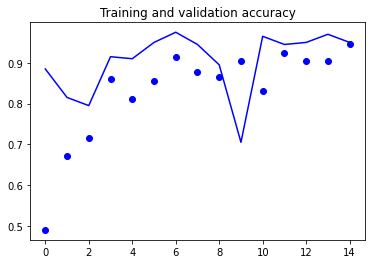

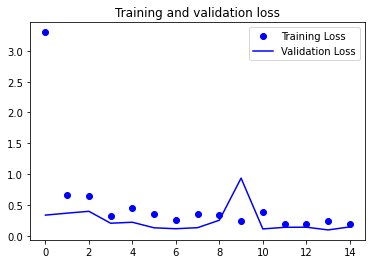

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
print(len(acc), len(val_acc), len(epochs))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()